In [51]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from distutils.dir_util import copy_tree
import os

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [52]:
class RunResult:
    def __init__(self, errors, evs, params, hessian):
        self.errors = errors
        self.evs = evs
        self.params = params
        self.hessian = hessian

In [183]:
def sync():
    copy_tree("./", "D:\MyDrive\ST Yau Photos")


sync()

In [55]:
def get_run_result(summ_dir):
    summ_fns = os.listdir(summ_dir)

    jsons = []
    errors = []
    evs = []
    params = []
    hessian = []
    for fn in summ_fns:
        with open(summ_dir + fn) as file:
            data = json.load(file)
            jsons.append(data)
            evs.append(data['evs'])
            errors.append(data['error'])
            params.append(data['params'])
            hessian.append(data['hessian'])

    errors = pd.Series(errors, name='error')
    evs = pd.DataFrame(evs)

    return RunResult(errors, evs, np.array(params), np.array(hessian))


,abhlla,heslla,abhstlla,gra
0,893386.959681,893386.942815,893386.959681,891813.032869
1,822654.410559,849126.235302,845176.389866,847243.725331
2,768726.165704,813458.061077,806319.034837,837684.799883
3,734594.945389,783599.118957,783368.130167,834642.603031
4,713420.597150,759515.792835,767317.801116,832570.037354
5,700049.815063,743690.007155,754836.901286,831183.503872
6,645828.956085,735427.213698,744457.735779,829578.928216
7,639784.263522,731935.846133,735395.243353,828625.263398
8,597366.376793,731662.667591,727132.163707,827218.356095
9,541565.900561,731368.418688,719417.065782,826468.495135


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
0,-523342.809808,-455610.942985,-280347.053861,-230163.200620,-169366.291423,-39523.543564,-7863.770269,-3123.559373,-1238.202600,-588.896142,-221.627761,-85.564011,187.994577,744.195409,1164.774608,1933.018471,3875.641262,10937.084009,19441.002605,67275.787710,128677.227320,295778.778153,905202.149799,1.221762e+06,1.914954e+06,2.440354e+06,2.953336e+06,8.910303e+06,9.547738e+06,1.812604e+07,3.826366e+07,7.154176e+07,1.900839e+08,4.510065e+08,5.340569e+08,8.623538e+08,4.736211e+10
1,-472980.397636,-413597.622425,-236926.591490,-164431.600628,-149585.673222,-35620.287533,-7057.296797,-2389.004852,-794.945352,-398.007280,-186.257639,-61.008307,191.914191,631.139679,1366.114338,2007.640510,4025.832763,10648.006704,19230.845135,68776.721230,136739.800233,337445.367953,908984.557075,1.186971e+06,1.827373e+06,2.290461e+06,2.835505e+06,8.445103e+06,9.238146e+06,1.737346e+07,3.730516e+07,6.956421e+07,1.805576e+08,4.423306e+08,5.305897e+08,8.478174e+08,4.743991e+10
2,-432472.454114,-375778.911123,-214386.309729,-148762.866483,-82705.670154,-32288.710152,-6353.497568,-1999.905188,-535.001657,-215.238803,-125.035636,-37.088558,211.846304,851.404986,1497.184603,2211.070003,4778.924394,10367.279809,19450.423804,69657.057043,145153.754193,376458.715268,892450.025715,1.151358e+06,1.744804e+06,2.051024e+06,2.821389e+06,7.962552e+06,8.996088e+06,1.697423e+07,3.634998e+07,6.748984e+07,1.721247e+08,4.397078e+08,5.279709e+08,8.438161e+08,4.735749e+10
3,-402191.463187,-346309.722386,-199170.032739,-140023.499022,-57226.423133,-29659.594472,-5834.378560,-1710.543041,-454.023850,-180.985825,-76.419617,-23.726558,199.562356,1181.805010,1459.241503,2439.798982,5809.688313,10032.418311,19842.888600,70198.786399,150942.009468,377766.988991,868930.348409,1.124675e+06,1.675878e+06,1.934016e+06,2.785339e+06,7.569629e+06,8.810838e+06,1.679471e+07,3.553243e+07,6.597627e+07,1.683960e+08,4.392492e+08,5.262789e+08,8.438980e+08,4.723596e+10
4,-379497.249766,-325300.640791,-187826.731050,-133406.065475,-32297.628641,-25125.872089,-5445.687804,-1486.182077,-387.940781,-159.214868,-48.261591,6.239381,185.626947,1380.943874,1808.837144,3152.365429,6992.953204,9615.575992,20011.705504,70644.098627,158809.537559,374090.409274,851122.661242,1.108148e+06,1.625985e+06,1.841955e+06,2.743771e+06,7.278365e+06,8.592770e+06,1.670978e+07,3.493632e+07,6.477837e+07,1.657929e+08,4.389747e+08,5.250802e+08,8.447105e+08,4.714118e+10
5,-363613.873696,-308798.099172,-180174.391005,-128715.142140,-27479.182373,-12074.012324,-5128.431149,-1300.130737,-327.789149,-142.946211,-34.505322,23.298077,174.230758,1336.474132,2100.396962,5022.264465,9386.047464,9893.333905,21110.435081,70772.321832,164546.896784,366199.961840,834522.930706,1.096540e+06,1.591738e+06,1.768067e+06,2.693262e+06,7.075905e+06,8.502951e+06,1.672855e+07,3.453099e+07,6.400535e+07,1.644073e+08,4.394291e+08,5.243975e+08,8.470106e+08,4.706823e+10
6,-269372.174336,-187214.950061,-131965.889775,-97209.454650,-19461.648646,-3682.094965,-2741.750272,-566.818549,-138.472707,-33.194827,4.133469,133.128675,287.910163,987.118509,2665.523052,8037.105603,9496.009197,20473.749193,32906.711608,72671.303387,176119.695916,371669.365991,834372.437038,1.014254e+06,1.376185e+06,1.711911e+06,2.845617e+06,5.803393e+06,7.896457e+06,1.563440e+07,3.186092e+07,6.010956e+07,1.623802e+08,4.393504e+08,5.198981e+08,8.429445e+08,4.672935e+10
7,-261959.313160,-175058.428281,-127281.105434,-93748.344426,-18741.793211,-3306.699499,-1630.160091,-520.193060,-132.613795,-22.568997,15.481901,131.226167,302.973093,959.113063,2721.089738,8278.230791,10039.663048,22998.447574,47223.242698,72503.259179,176408.187475,367393.003359,840630.721157,1.004614e+06,1.363368e+06,1.648868e+06,2.894795e+06,5.685314e+06,7.858191e+06,1.554784e+07,3.173179e+07,5.959578e+07,1.614544e+08,4.407414e+08,5.195118e+08,8.450854e+08,4.668377e+10
8,-205928.630909,-118564.285356,-101523.

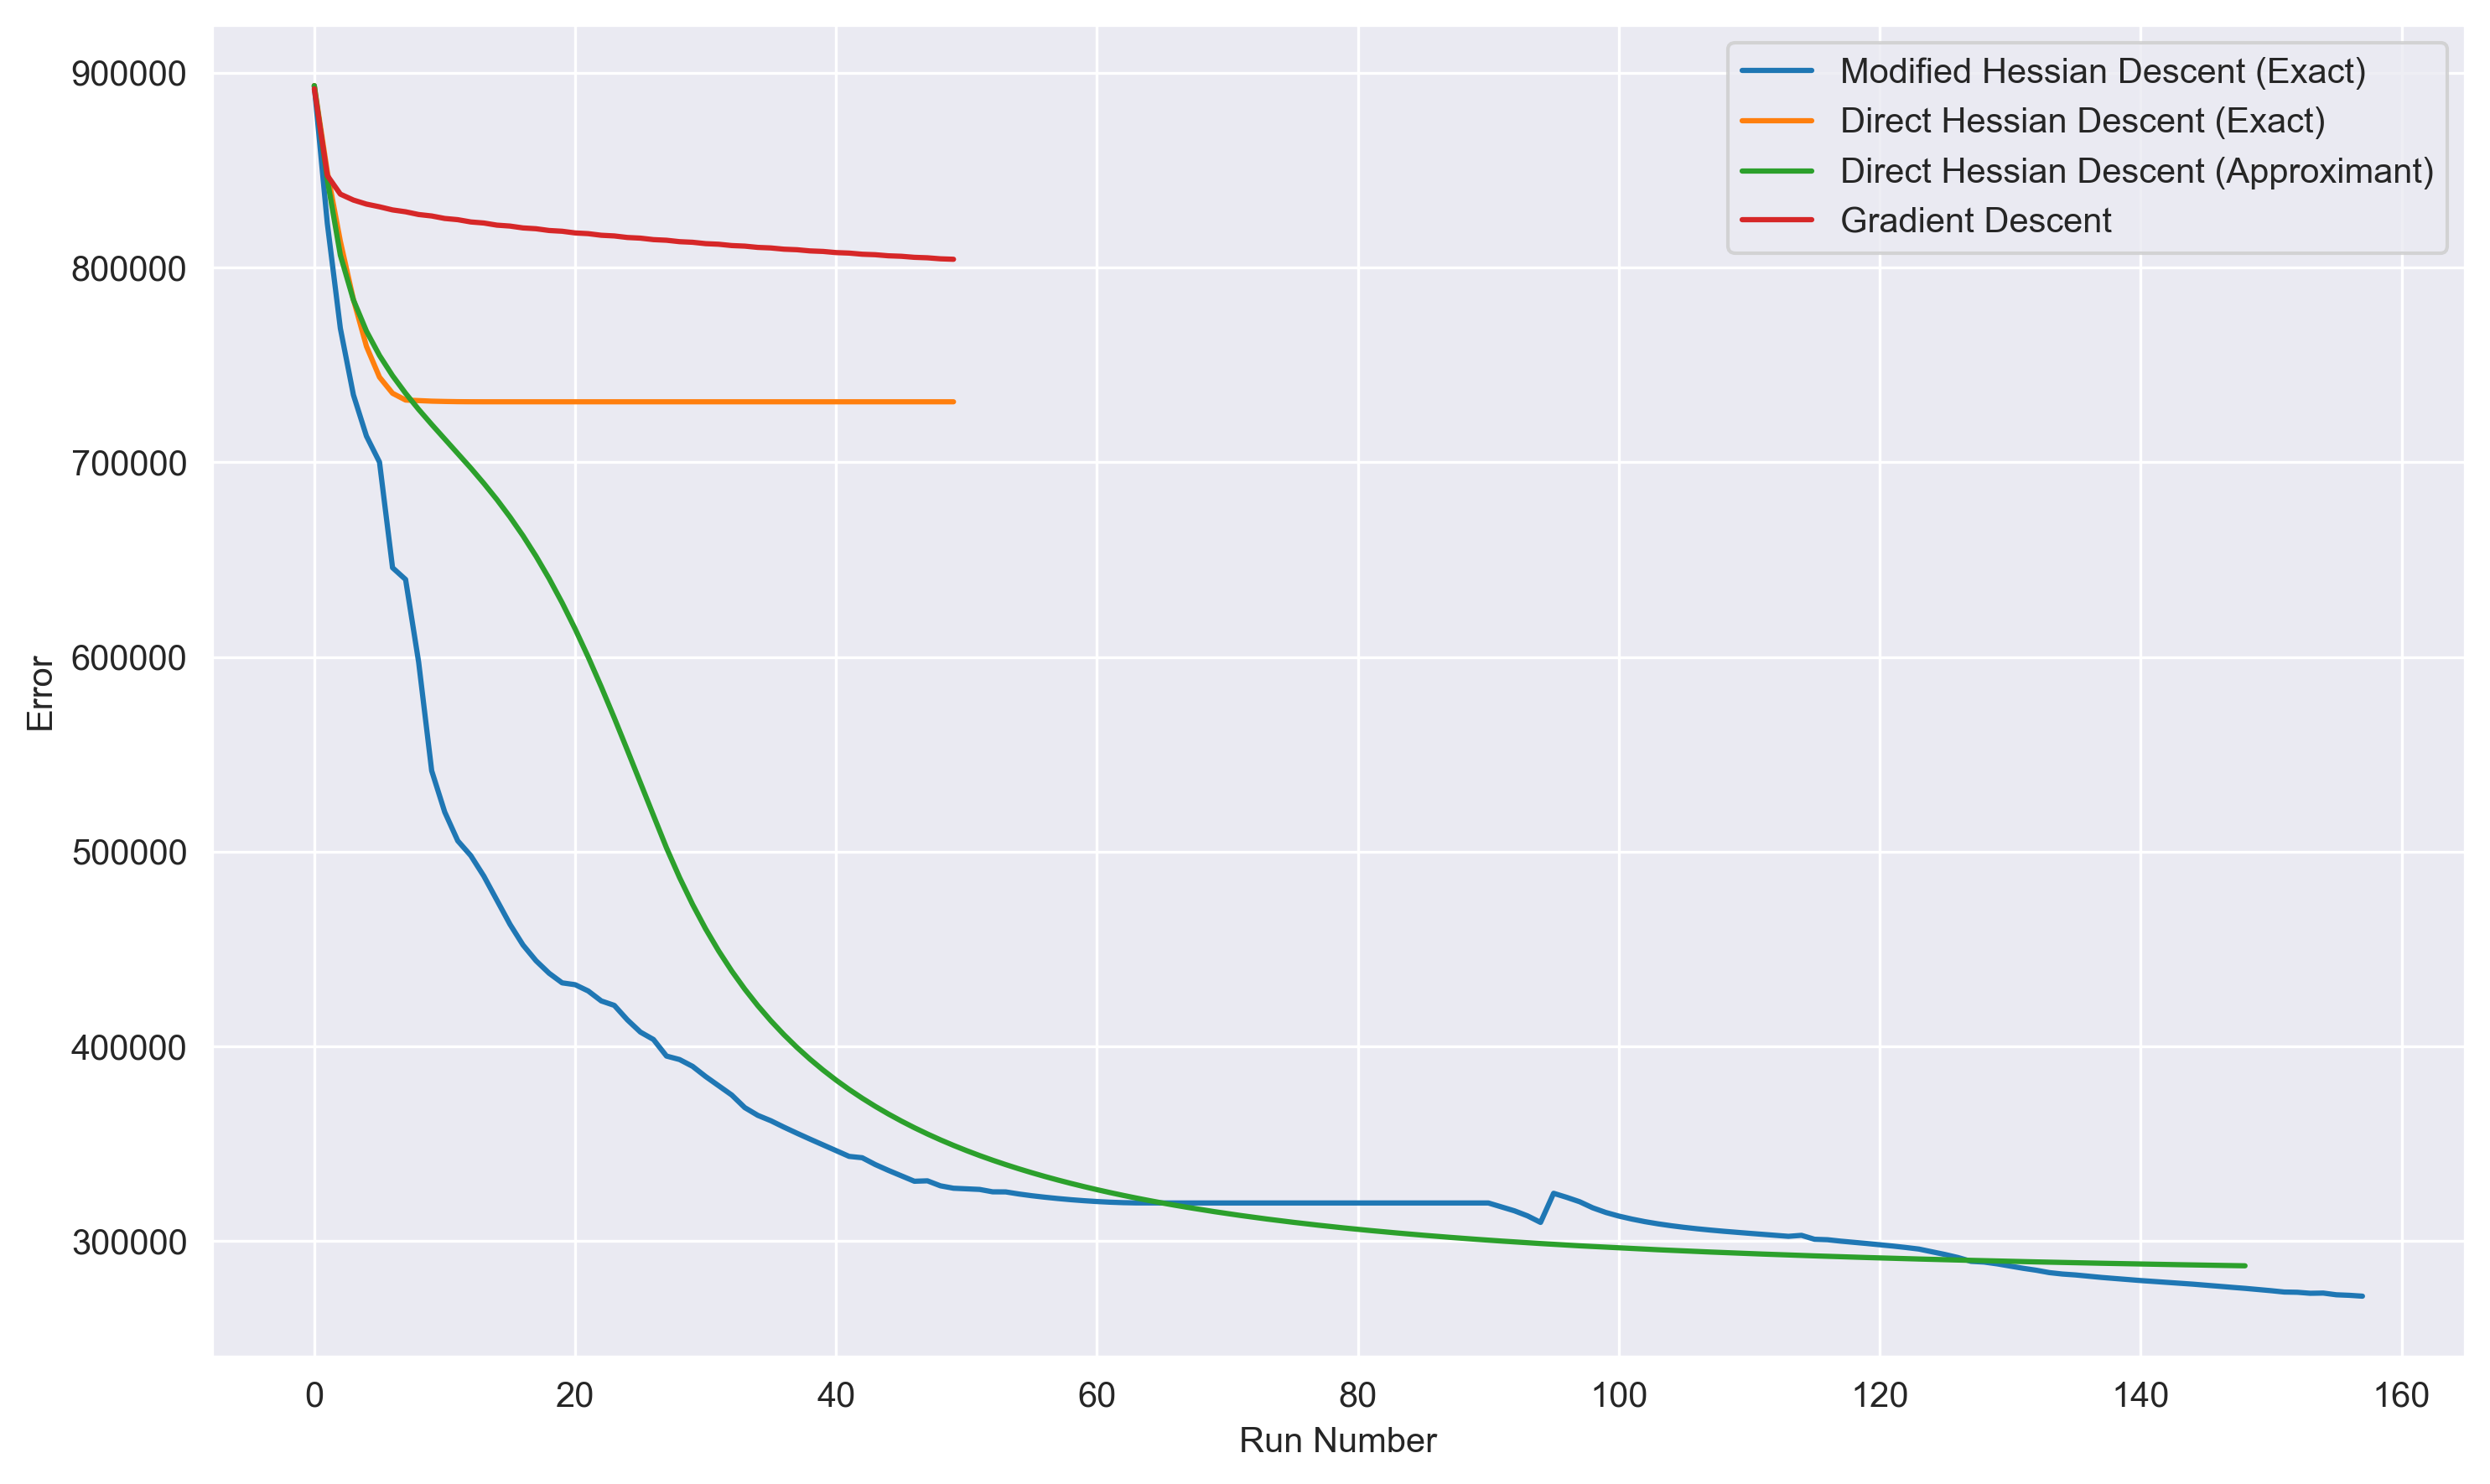

In [209]:
short = ['abhlla', 'heslla', 'abhstlla']
long = ['Modified Hessian Descent (Exact)',
        'Direct Hessian Descent (Exact)',
        'Direct Hessian Descent (Approximant)']

rrs = [get_run_result('../../archivesfixed/' + x + '/summaries/') for x in short]


def gr(string):
    return rrs[short.index(string)]


# rrs.append(get_run_result('../../summaries/'))
# short.append('curr')
# long.append('Current')

# curr = get_run_result('../../summaries/')
# rrs[0].errors = pd.concat([rrs[0].errors,curr.errors], ignore_index=True)

gradient_errors = pd.read_csv('../ssef/gradienterrors.csv', header=None).iloc[:50]
short.append('gra')
long.append('Gradient Descent')

errorss = [x.errors for x in rrs]
errorss.append(gradient_errors)
errors_df = pd.concat(errorss, axis=1)
errors_df.columns = short
display(errors_df)

plt.figure(figsize=(10, 6), dpi=300, tight_layout=True)
ax = None
for rr in rrs:
    ax = sns.lineplot(x=rr.errors.index, y=rr.errors)

sns.lineplot(x=[i for i in range(len(gradient_errors))], y=gradient_errors[0])

ax.legend(long)
ax.set(xlabel='Run Number', ylabel='Error')

plt.savefig('rvs-abhlla.png')
gr('abhlla').evs

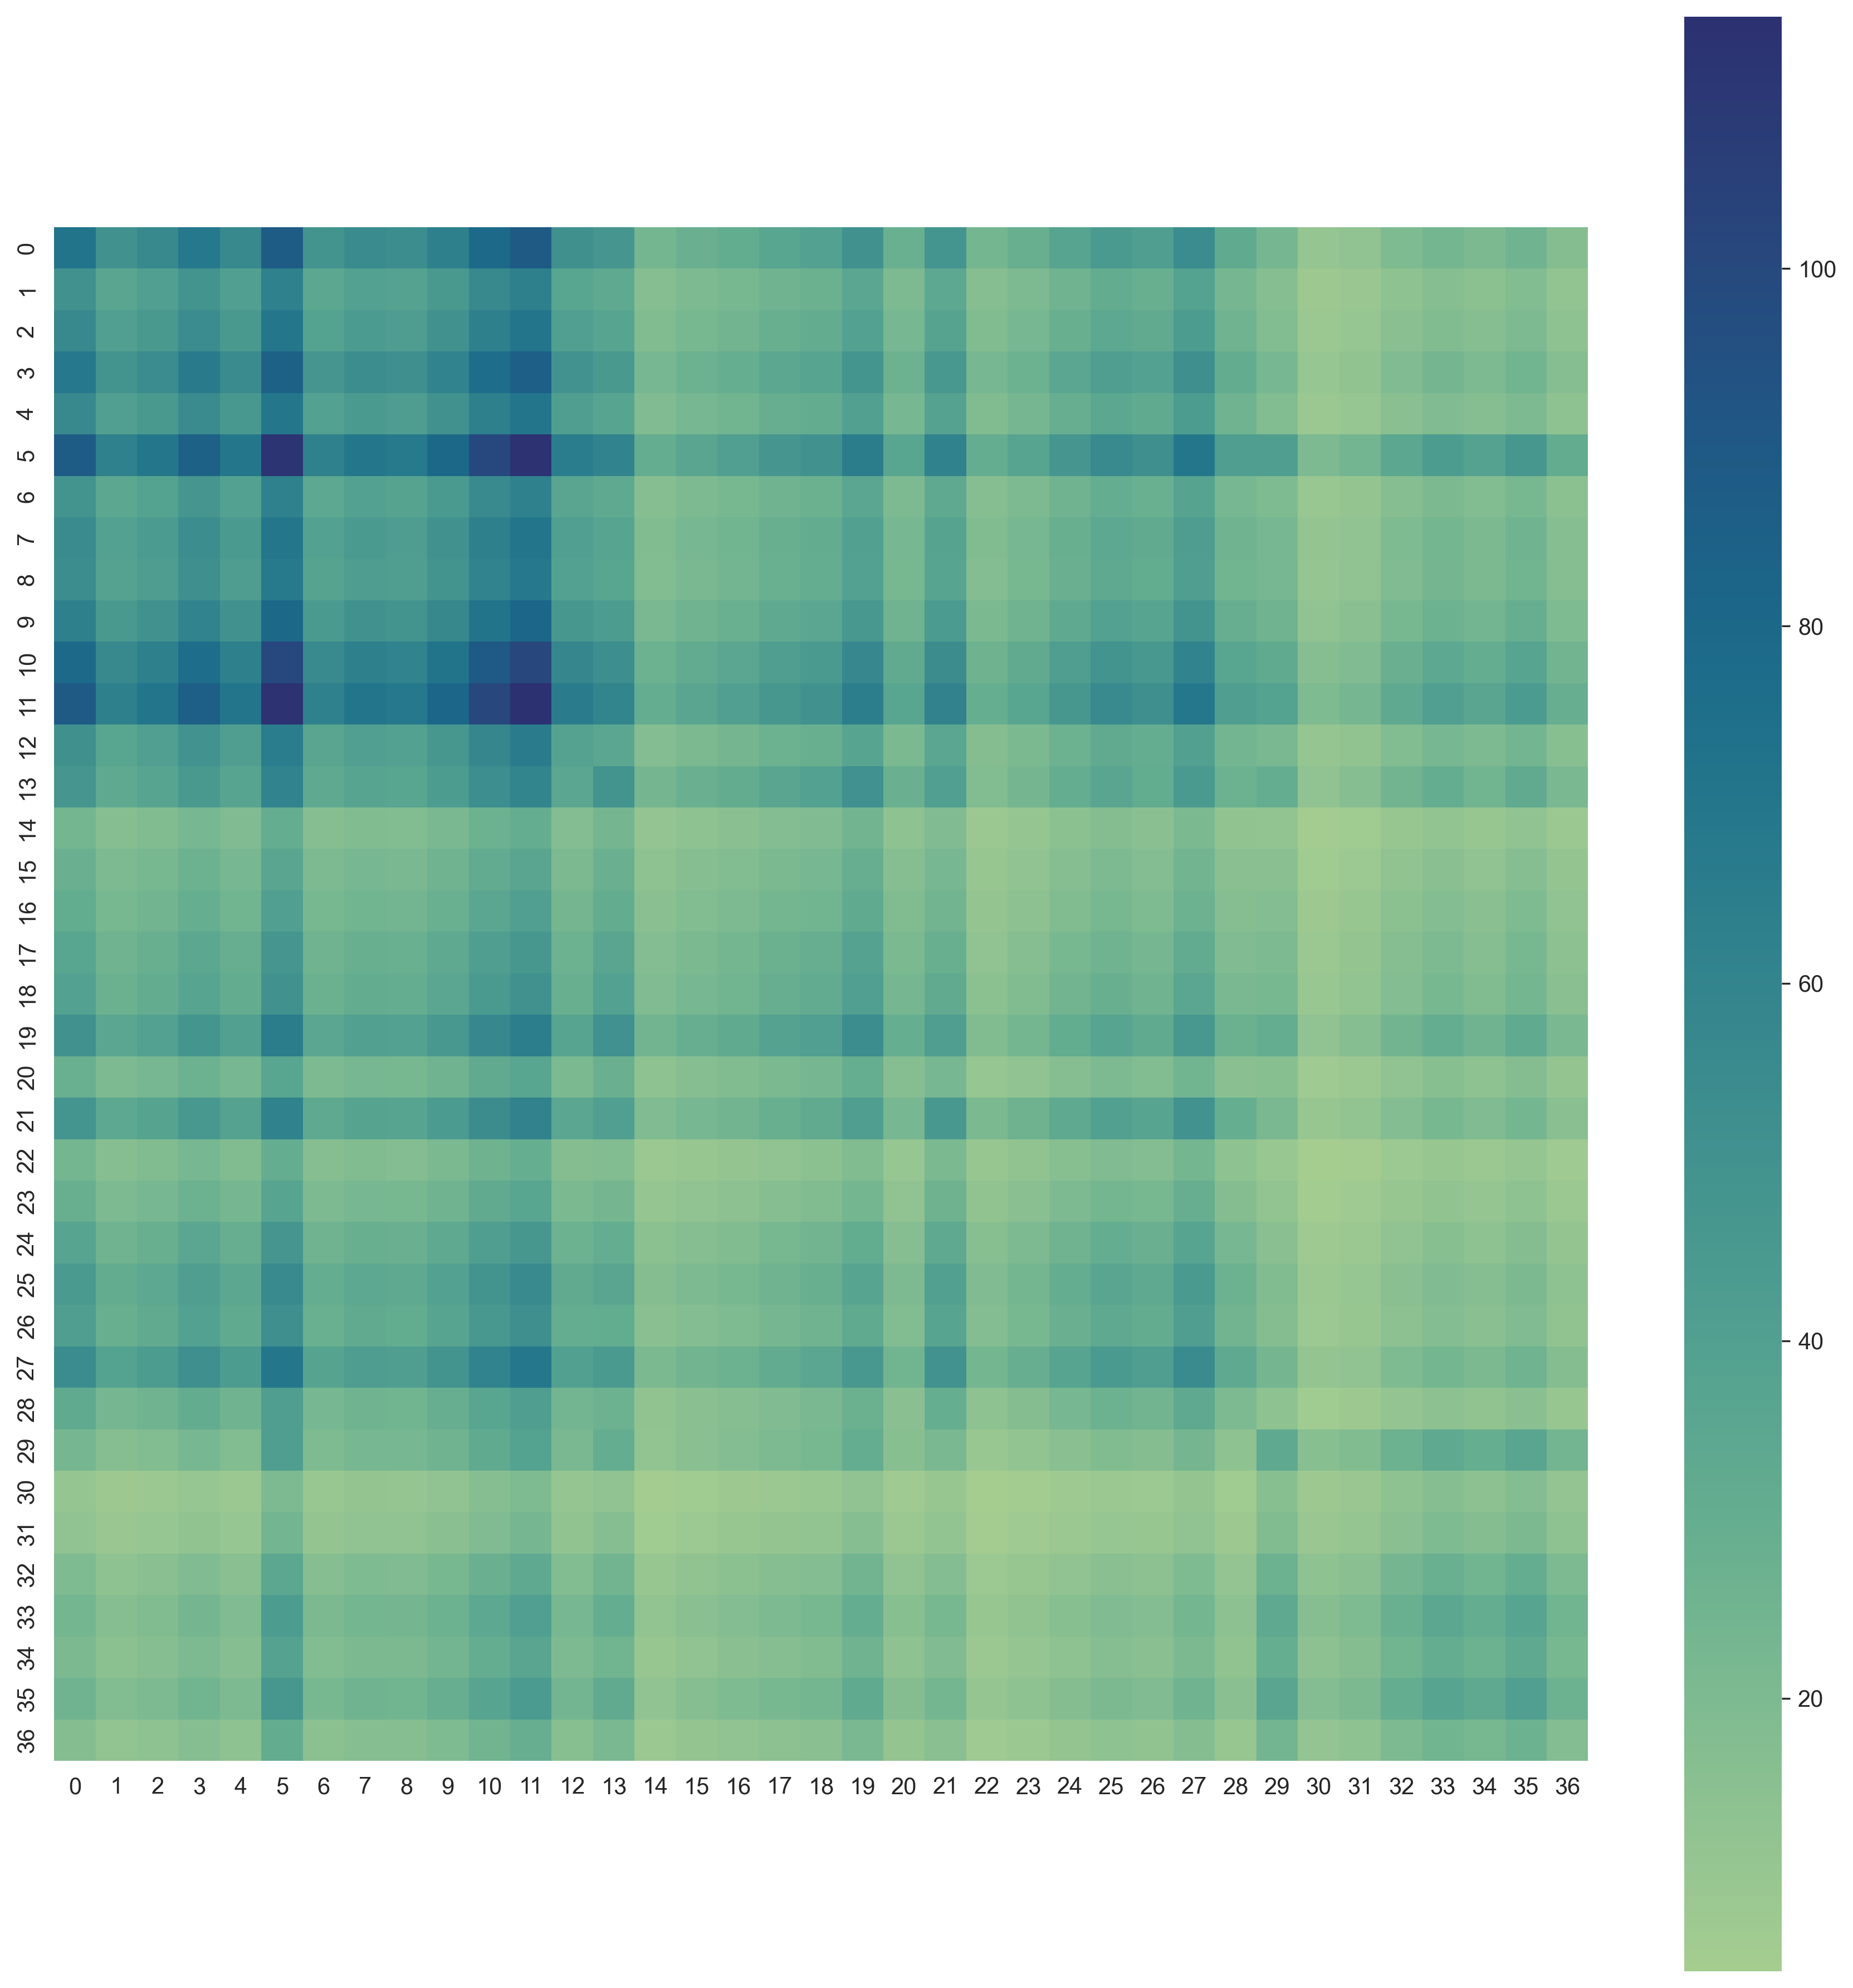

In [177]:
def plot_hessian(hes, cmap='crest'):
    plt.figure(figsize=(12, 12), dpi=300, tight_layout=True)

    sns.heatmap(hes, cmap=cmap, square=True)


abhlla = gr('abhlla')
abhstlla = gr('abhstlla')

plot_hessian(np.power(np.abs(abhlla.hessian[0]), 1 / 5))
plt.savefig('regular-hessian.png')

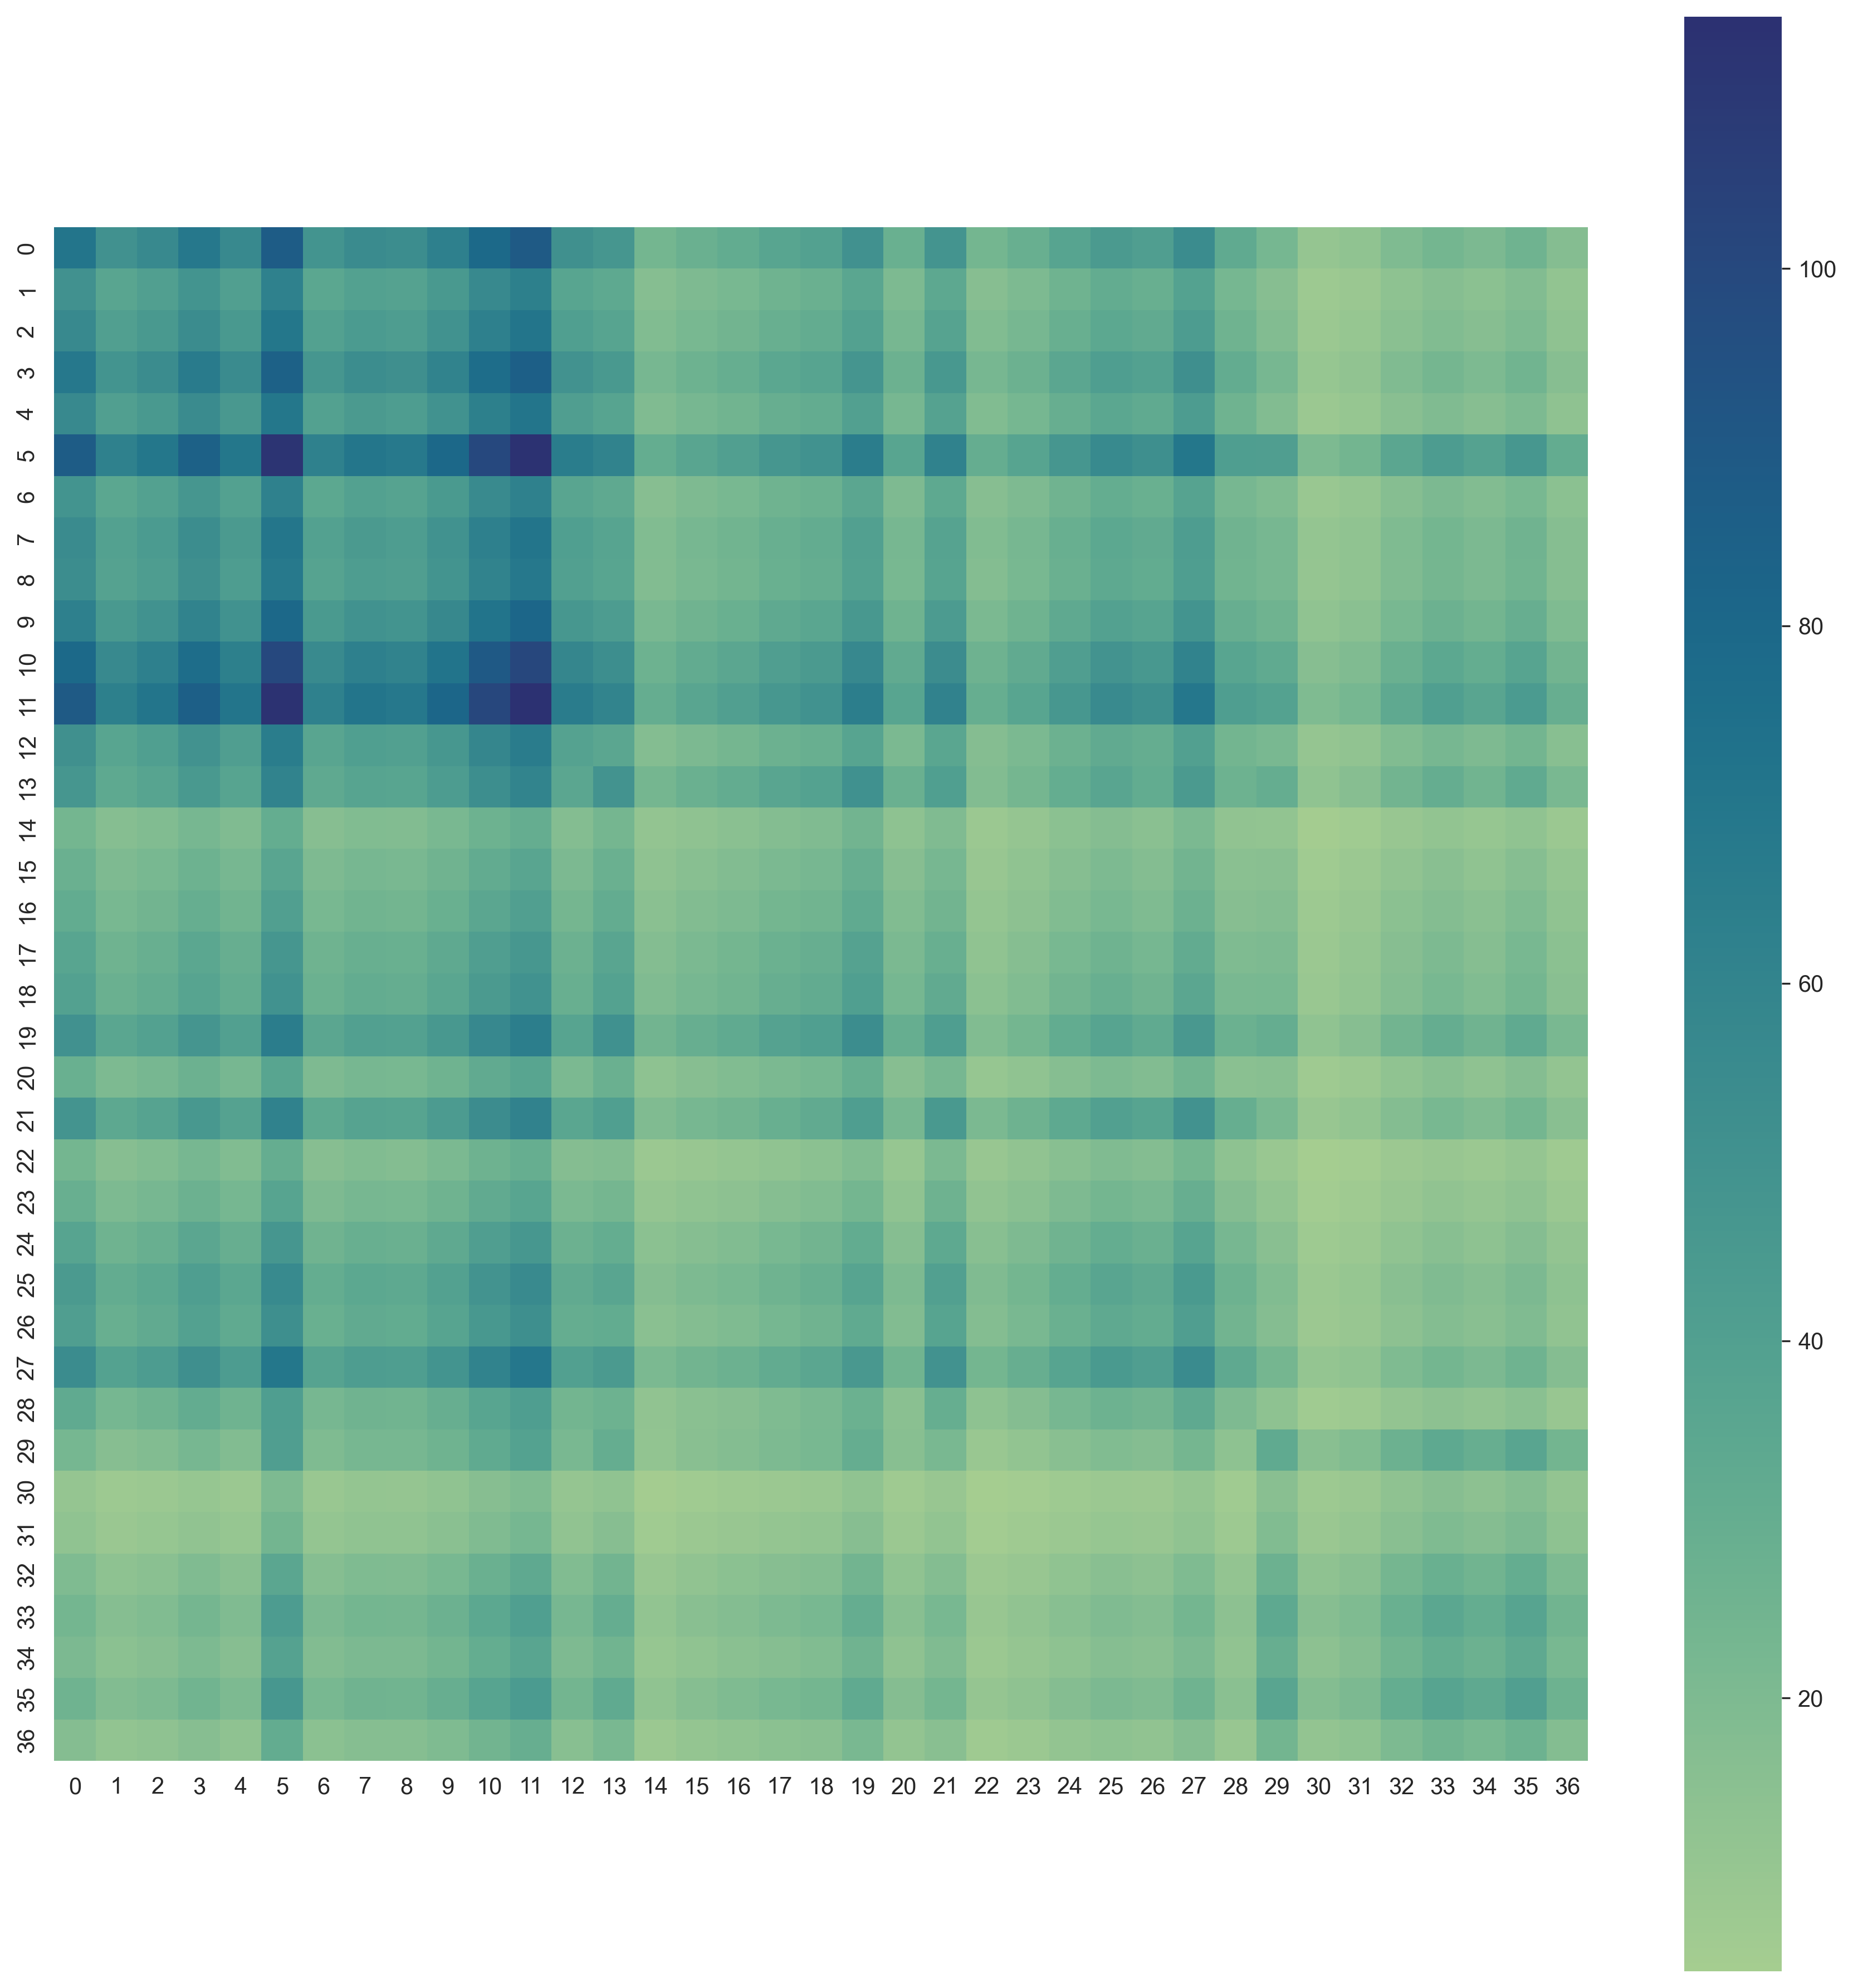

In [178]:
plot_hessian(np.power(np.abs(abhstlla.hessian[0]), 1 / 5))
plt.savefig('stewart-hessian.png')


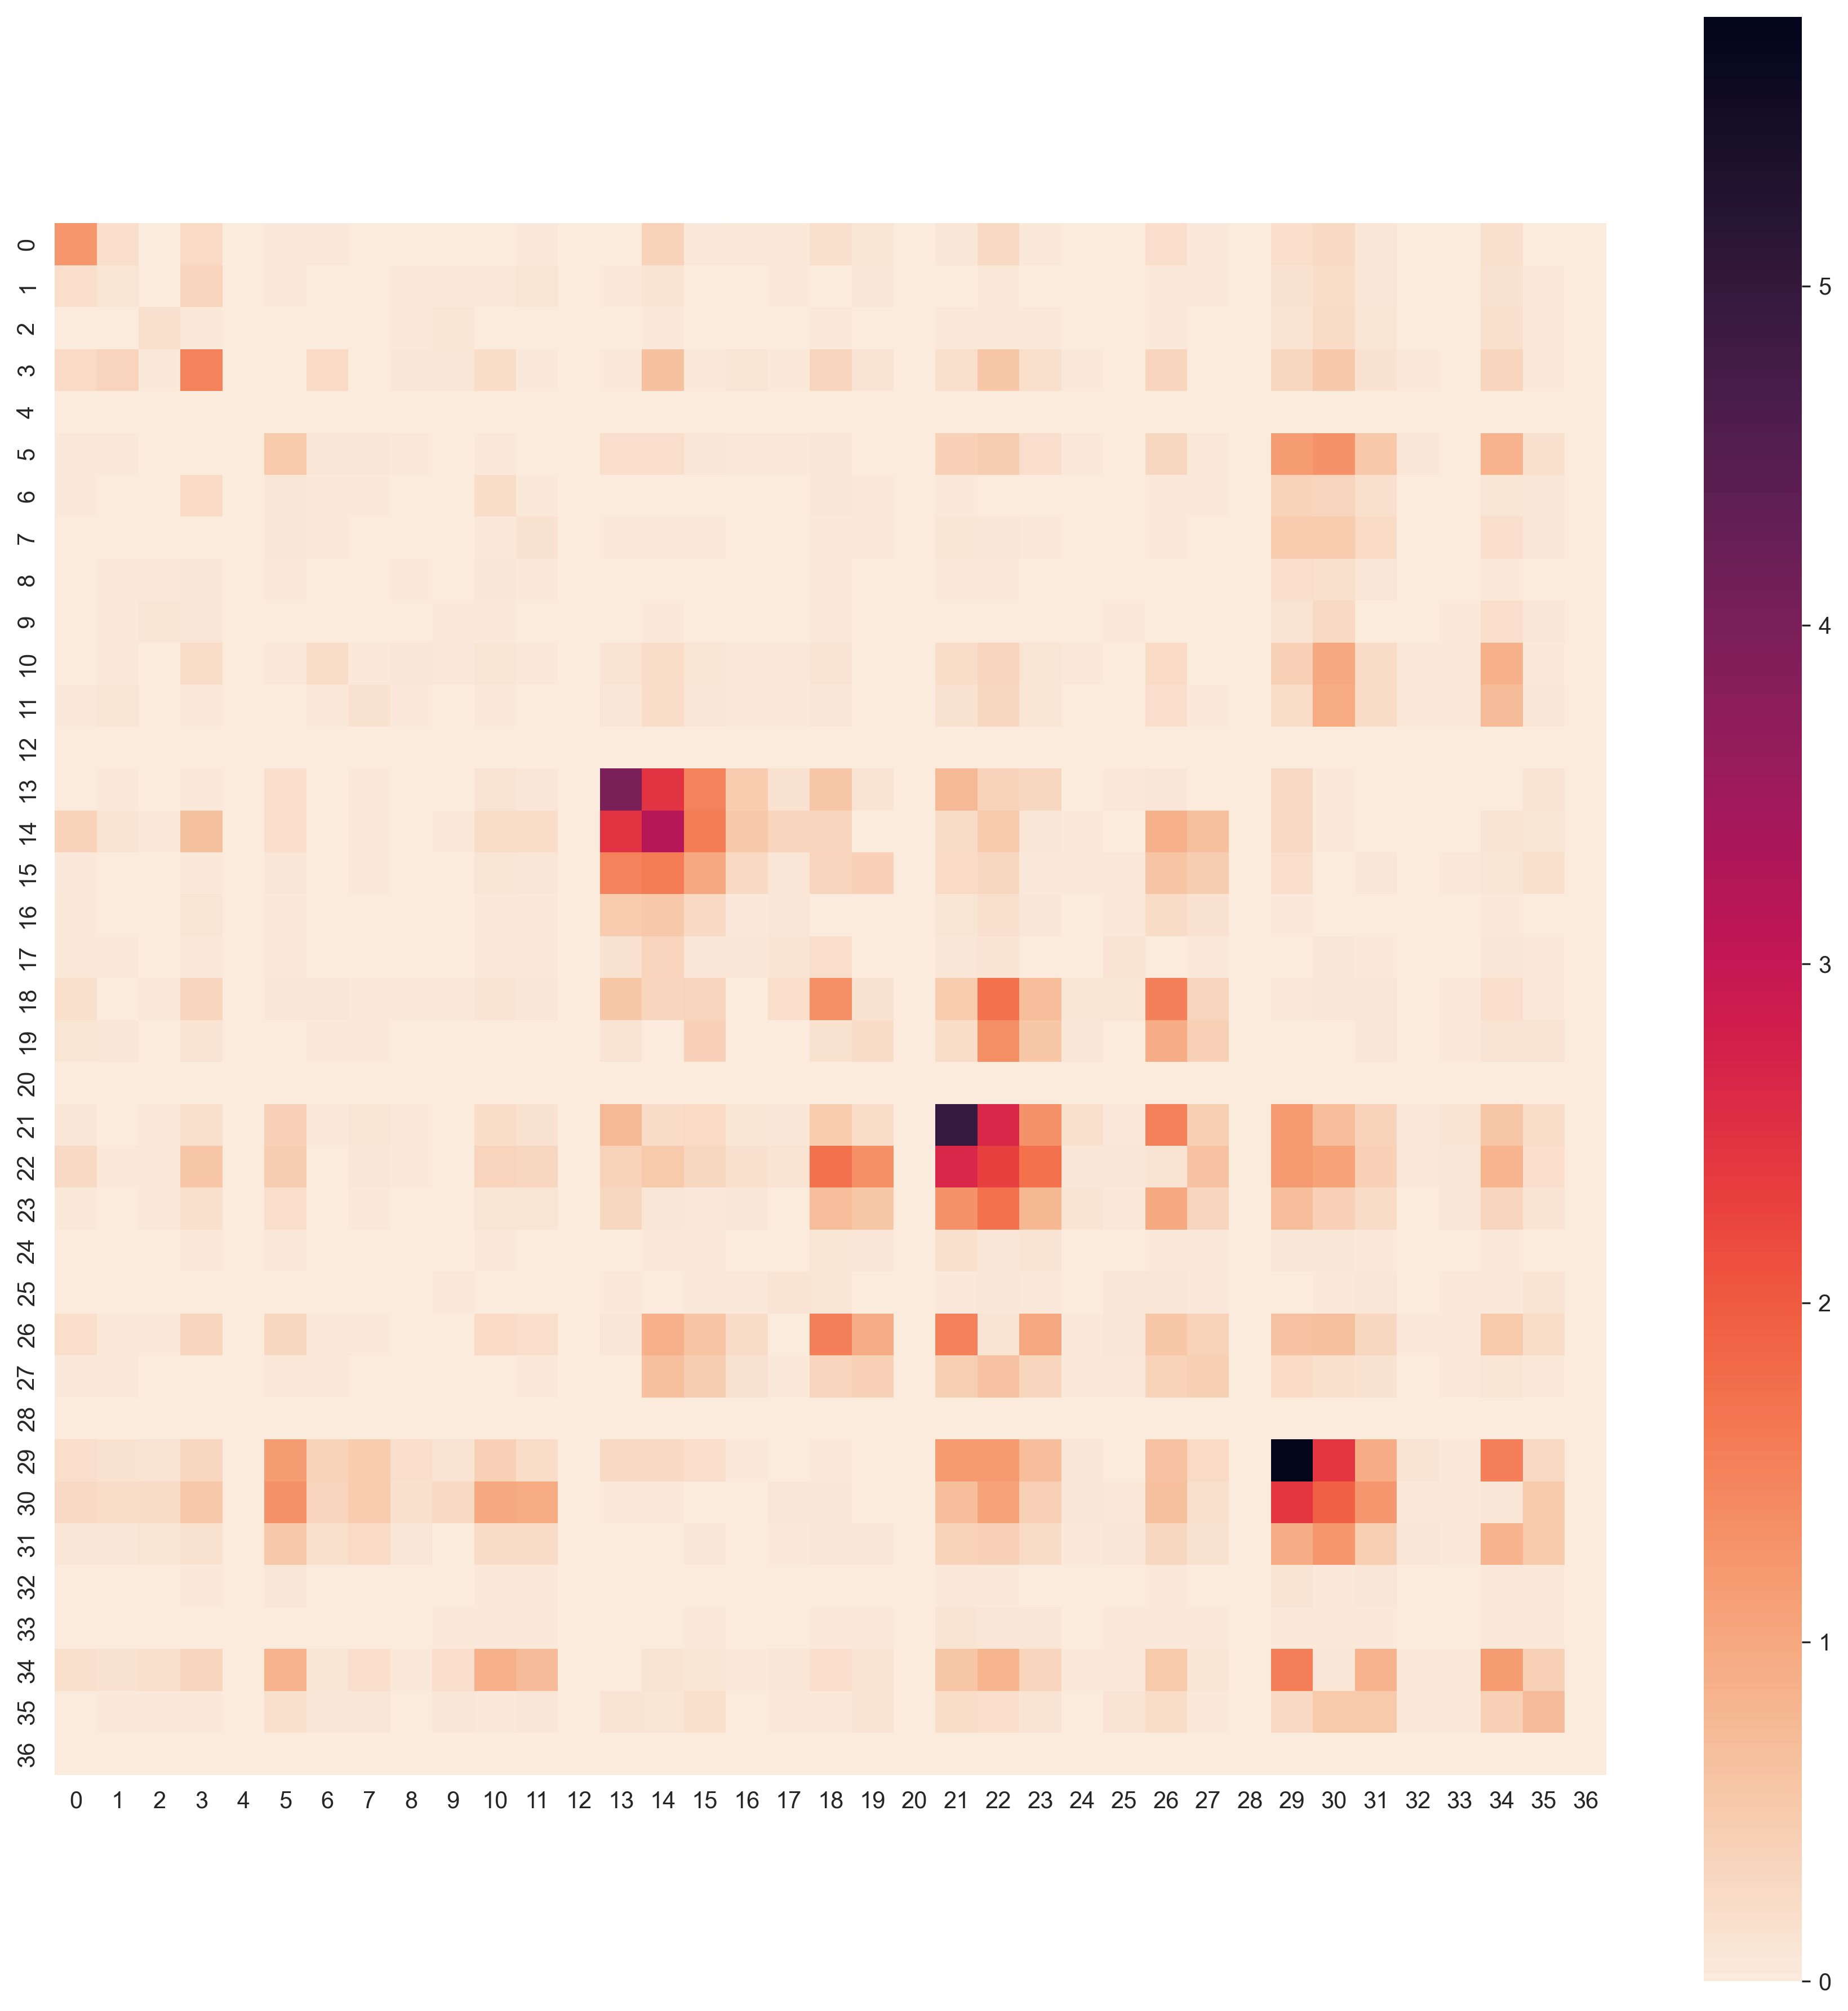

In [179]:
plot_hessian(np.abs((abhstlla.hessian[0] - abhlla.hessian[0]) / abhlla.hessian[0]) * 100, 'rocket_r')
plt.savefig('hessian-diff.png')


In [180]:
final_params = abhlla.params[48].T
np.savetxt('final-params.csv', final_params, delimiter=',', fmt='%f')
final_params

array([[   2.71513636,    2.62559521,    2.88245222,    3.22705104,
           3.47886889],
       [  -6.37815418,  -16.96689205,  -17.86111452,  -66.39741844,
         -94.93436933],
       [   0.        ,   -7.26298848,  -18.53907902,  -26.01365453,
         -34.07117191],
       [ -11.88508885,  -50.653037  ,  -64.41435137,  -98.25141672,
        -124.61406162],
       [   0.        ,  -39.0834945 ,  -56.89510854,  -78.40840365,
        -106.01593125],
       [   1.31762699,    1.85708607,    2.79576522,    4.85389378,
           5.63049676],
       [   0.        ,    1.81810351,    2.15427412,    2.46562155,
           2.95131139],
       [ -11.77284403, -116.02801531, -186.88013731, -317.19842434,
        -463.00320004],
       [  12.848     ,   12.23      ,   13.59      ,   15.42      ,
          16.92      ],
       [   0.        ,   11.47      ,   12.66      ,   14.48      ,
          17.25      ],
       [   0.        ,    2.43      ,    3.14      ,    3.94      ,
           4

In [181]:
np.savetxt('initial-eigen-regular.csv', abhlla.evs.iloc[0])
np.savetxt('initial-eigen-stewart.csv', abhstlla.evs.iloc[0])


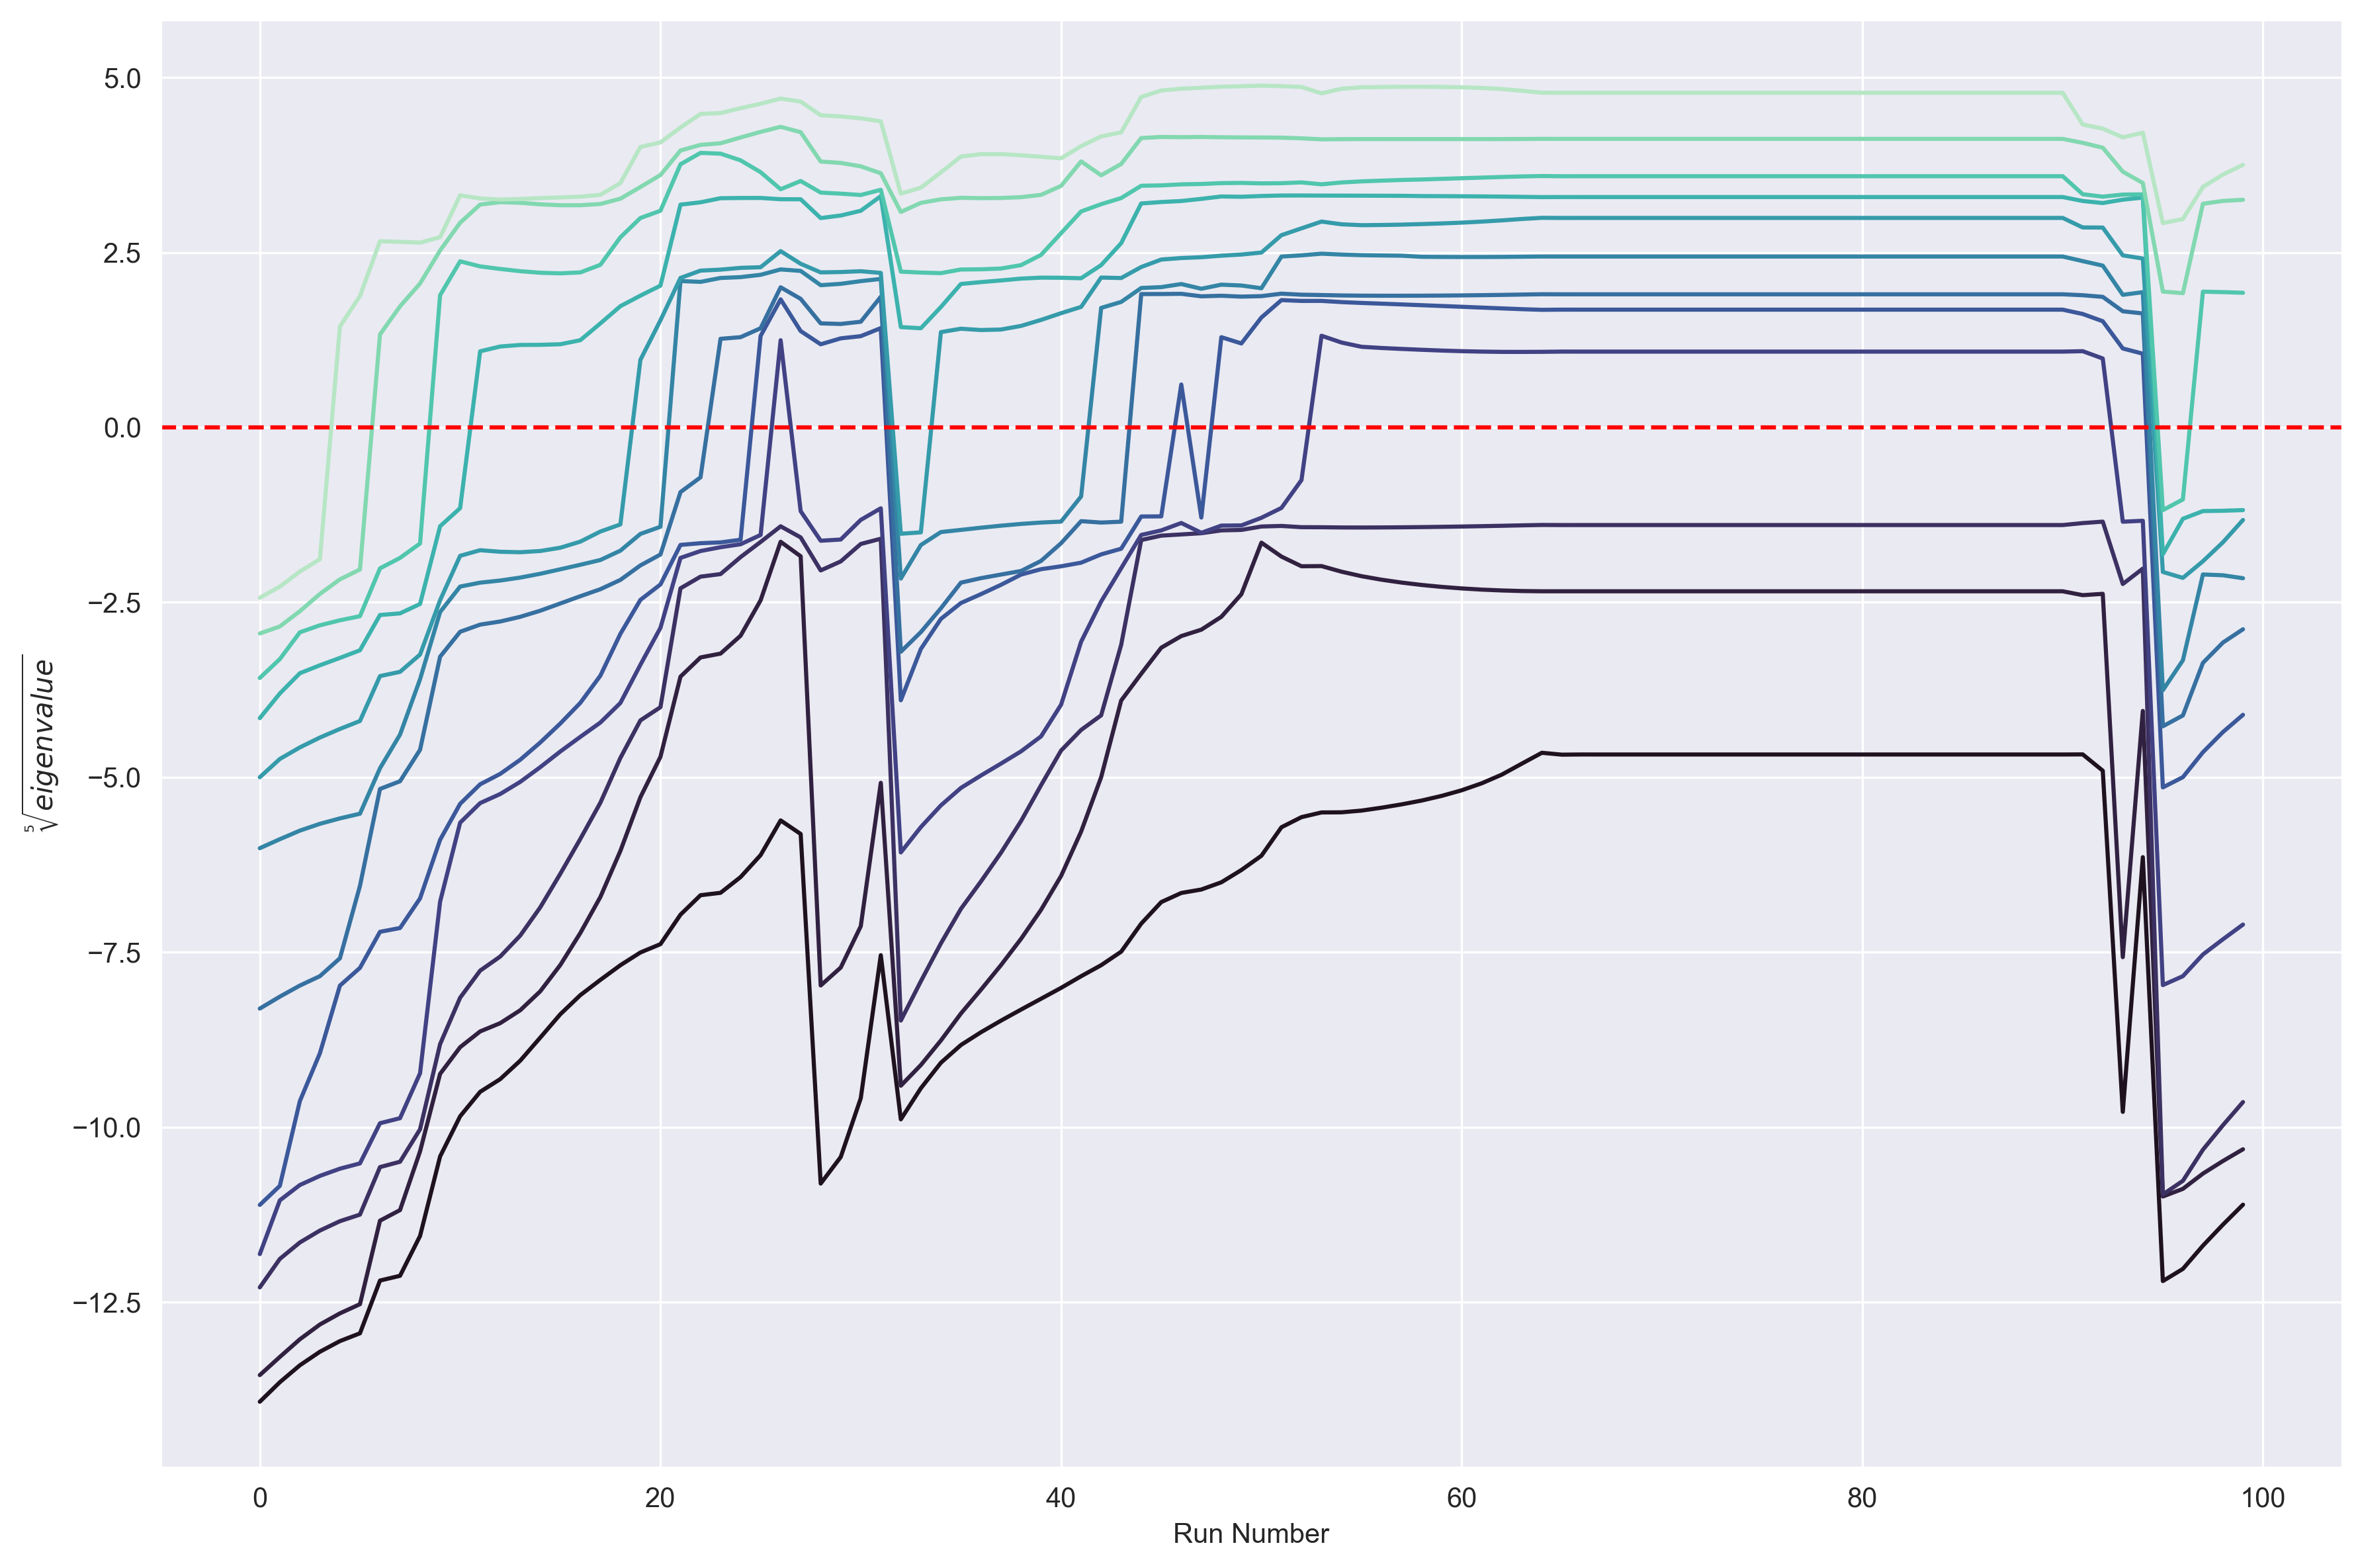

In [182]:
n = 12
evs = abhlla.evs.iloc[:, :n]
logevs = np.sign(evs) * evs.abs() ** (1 / 5)

plt.figure(figsize=(12, 8), dpi=300, tight_layout=True)
pal = sns.color_palette('mako', n)

ax = None
for i in range(len(logevs.columns)):
    ax = sns.lineplot(x=logevs.index, y=logevs[i], color=pal[i])

ax.set(xlabel='Run Number', ylabel=r'$\sqrt[5]{eigenvalue}$')

plt.axhline(y=0, color='r', linestyle='--')

plt.savefig('neg_evs.png')
sync()

<AxesSubplot:>

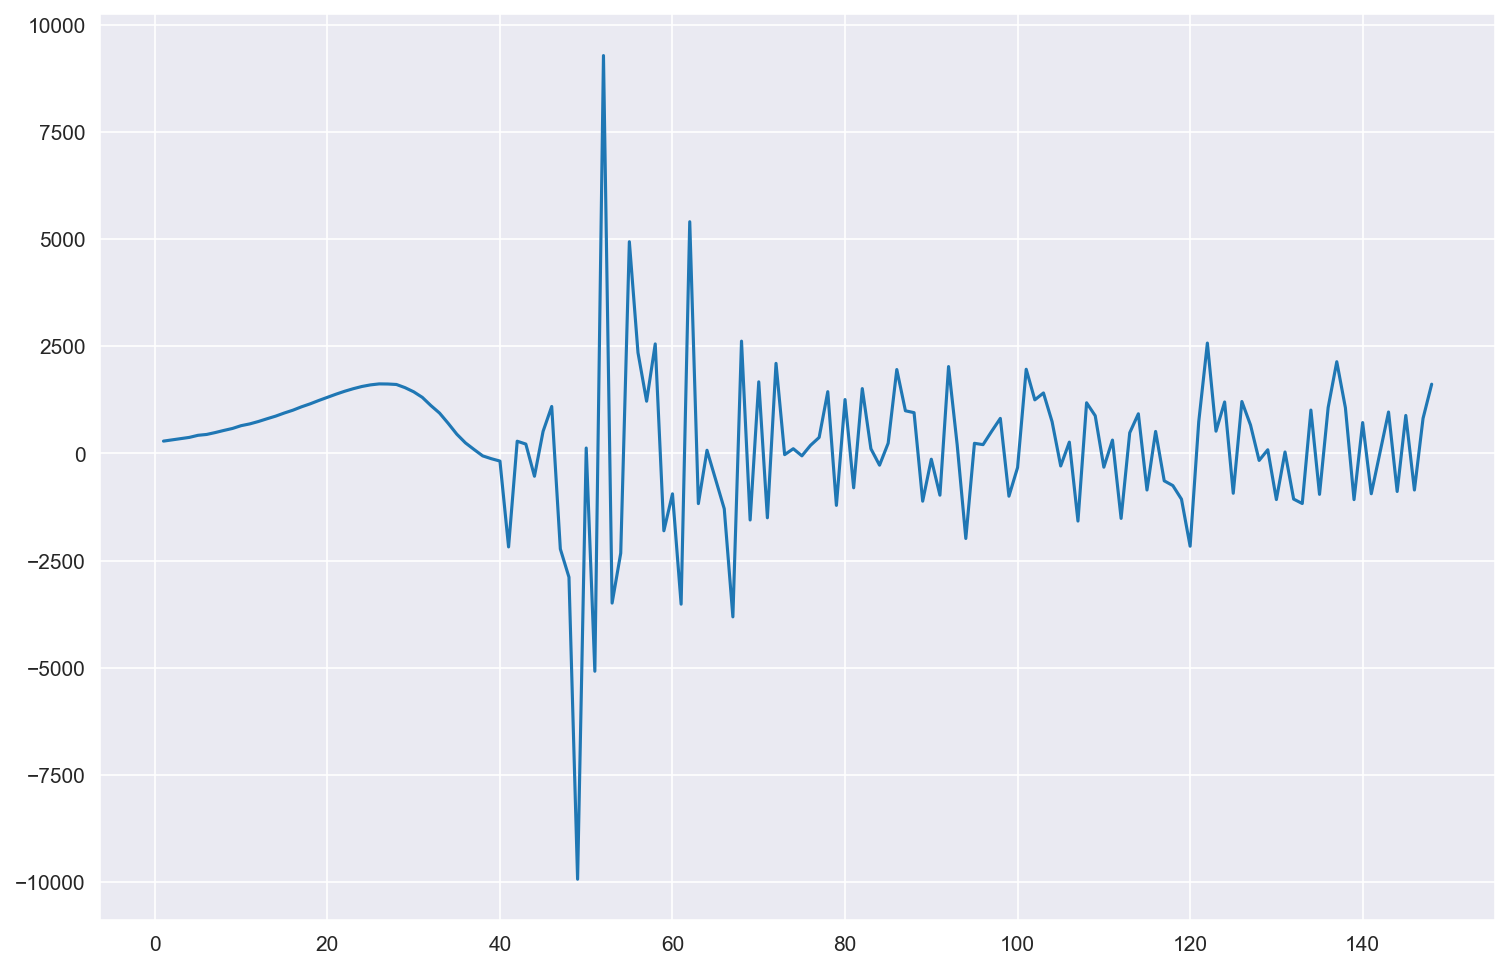

In [50]:
endn = len(abhst.errors) - 1
ggs = []

for i in range(1, endn):
    g = abh.errors[i] - abh.errors[i - 1]
    stg = abhst.errors[i] - abhst.errors[i - 1]
    ggs.append(g - stg)

plt.figure(figsize=(12, 8), dpi=150)
sns.lineplot(x=[x for x in range(1, endn)], y=ggs)

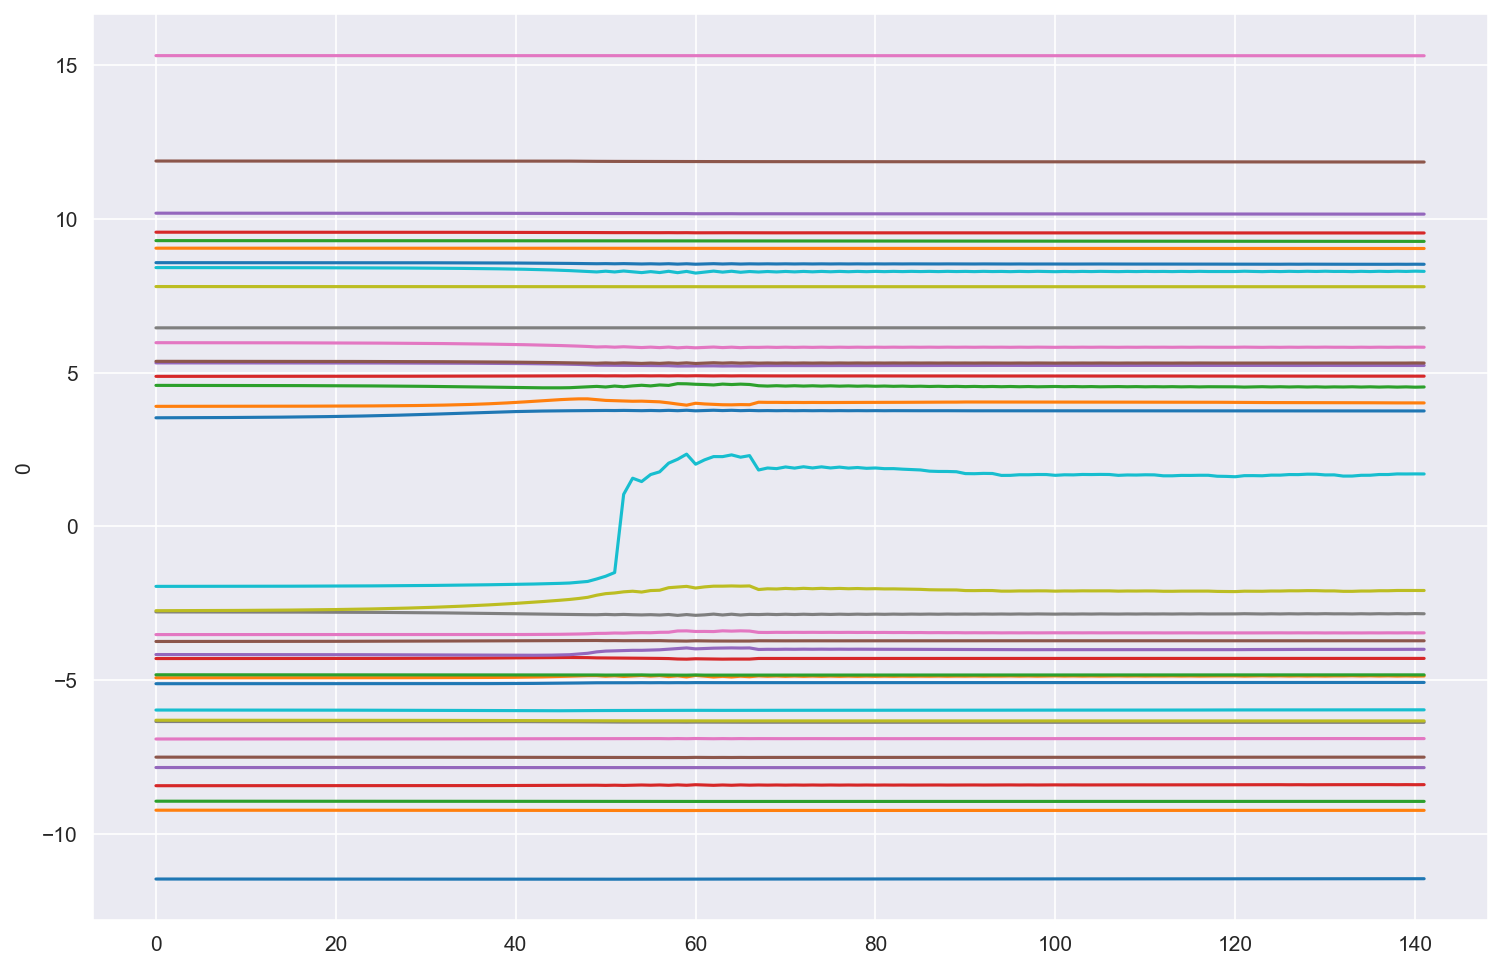

In [196]:
logevs = np.sign(evs) * evs.abs() ** (1 / 9)
# logevs = np.sign(evs) * np.log10(evs.abs())

plt.figure(figsize=(12, 8), dpi=150)
for i in range(len(logevs.columns)):
    sns.lineplot(x=logevs.index, y=logevs[i])

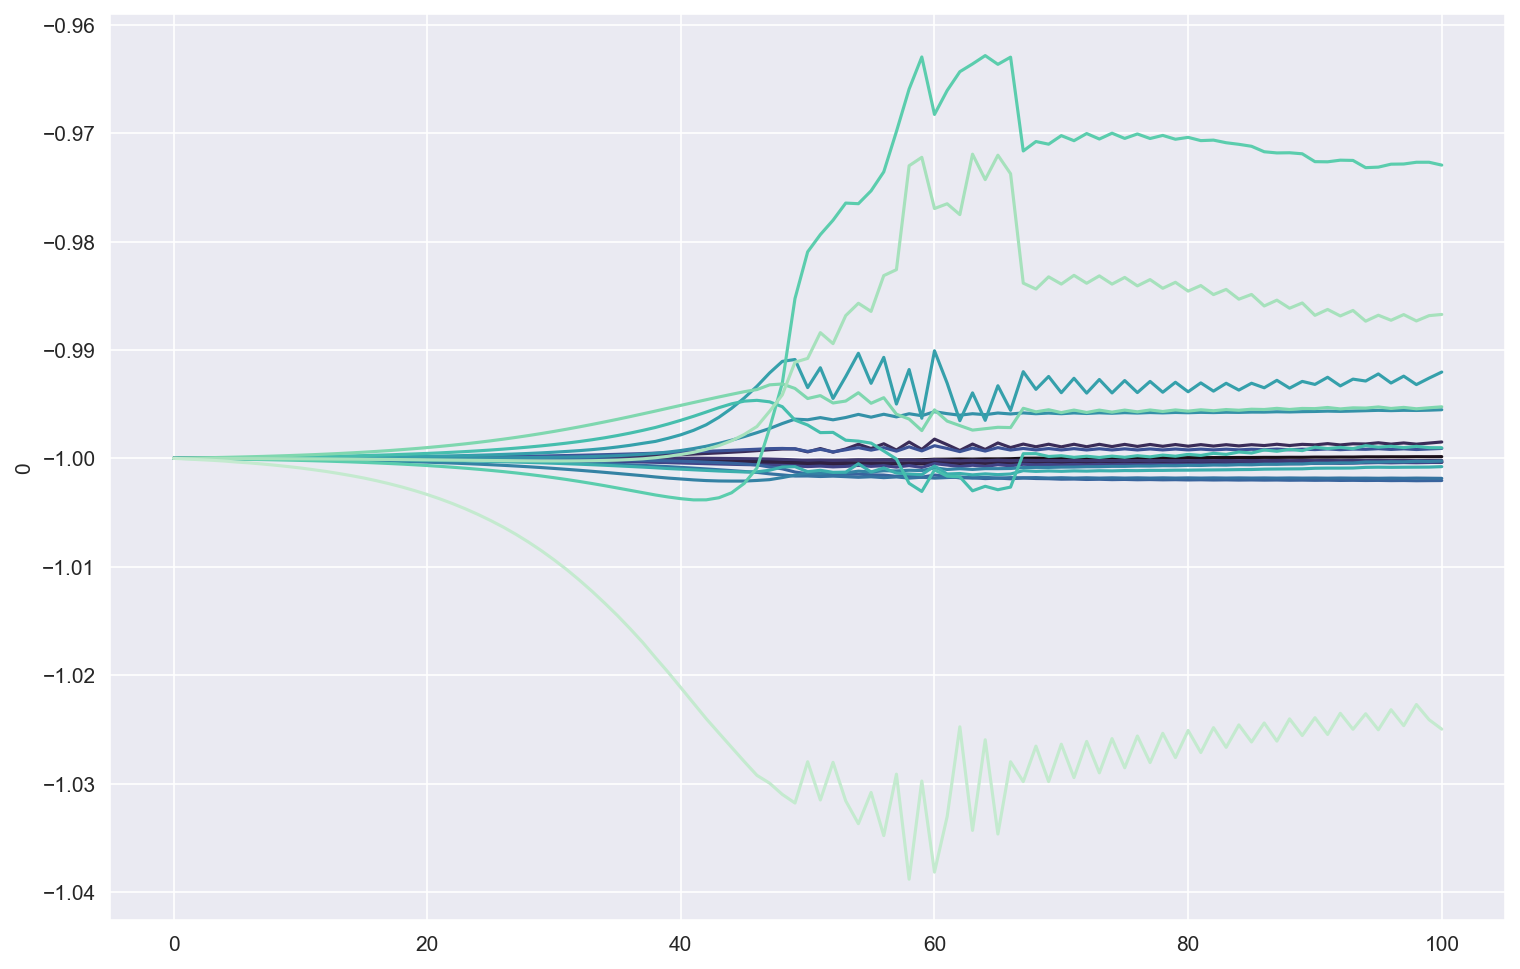

In [181]:
plt.figure(figsize=(12, 8), dpi=150)

n = len(logevs.columns)
n = 18
pal = sns.color_palette('mako', n)
for i in range(n):
    sns.lineplot(x=logevs.index, y=logevs[i] / abs(logevs.iloc[0, i]), color=pal[i])
